```Name: Wong Wen Bing```    
```Admin #: 230436M```  
```PEM GROUP: AA2303```   

# About Objective: Classifying Birds
This is a series of jupyter notebooks aimed at using Python in conducting text classification in predicting the type of birds. 

In the dataset provided, there are 2 columns: description and species (4 species). This is hence a supervised learning problem due to the presence of labelled data.

In this problem, a fake positive / fake negative where the species are predicted wrongly, often carry severe consequences. As such, a good and accurate model must have a balance of sensitivity and specificity, as such F1 score will be used as the main metric here. 



# **Part 3: Text Feature Engineering and Modelling (3/3)**  
This final notebook, will contain testing the model on a new test set. This new set will undergo pre-processing techniques as per those in Part 1 of this series of notebooks. After which, a label(species) will be predicted based on the description.

Install and import libraries

In [1]:
# pip install openpyxl pandas nltk numpy scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer 
import re
import seaborn as sns
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score, confusion_matrix
import pickle


## **Section A: Import Test Set, Tokenizers, Models**

Import Dataset

In [3]:
testset=pd.read_excel('Data_test.xlsx')
testset.head()

,description,species
0,Looking for fun and interesting facts about a ...,Black-naped Oriole
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole
2,javanicus displayed during feeding such as wal...,Javan Myna
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole
4,NaN,Javan Myna


Import MWE Tokenizer

In [4]:
with open('MWE Tokenizer.pkl', 'rb') as f: 
    mwe=pickle.load(f)
    print(mwe)

Import Vectorizer

In [5]:
with open('CountVectorizer.pkl', 'rb') as f: 
    cv=pickle.load(f)
    print(cv)

CountVectorizer(max_features=7000, ngram_range=(1, 2))


Import Model

In [6]:
#Model 1
with open('LinearSupportVectorMachine.pkl', 'rb') as f: 
    lvc=pickle.load(f)
    print(lvc)

SGDClassifier(alpha=0.001, max_iter=15, random_state=42, tol=None)


In [7]:
#Model 2
with open('ComplementNaiveBayes.pkl', 'rb') as f: 
    cnb=pickle.load(f)
    print(cnb)

ComplementNB()


## **Section B: Cleaning and Processing Dataset**
Based on the preprocessing techniques in Part 1, the same will be conducted for the test set. 

1. removing of stopwords
2. removing special characters in word
3. tokenizing the word
4. lemmatize the word as well
5. Removing the words containing the species (labels)
6. Removing short sentences (less than 25 in length)

In [8]:
lemma=WordNetLemmatizer() #lemmatization
stopwordss=stopwords.words('english') #list of stopwords

def preprocess_text(text):
    text=str(text)
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', ' ', text) #remove all special characters
    text = re.sub(r'\s\s+',' ', text) #remove all extra spaces (>1 whitespace)
    words=word_tokenize(text)
    text=[]
    for word in words: 
        if word not in stopwordss: 
            normalized = lemma.lemmatize(word)
            text.append(normalized)
            
    return ' '.join(text)

In [9]:
testset['cleaned_text'] = testset['description'].apply(lambda x:preprocess_text(x))
testset.head()

,description,species,cleaned_text
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking fun interesting fact black naped oriol...
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed feeding walking jumping ho...
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,black naped oriole explore topic name descript...
4,NaN,Javan Myna,nan


After conducting the standard preprocessing (lemmatising, removing stopwords,tokenisation and removal of special characters), removing the words that are tokenized by the mwe_tokenizer like javan_myna, black_naped_oriole.

In [10]:
def remove_mwe_tokens(tokens): 
    txt=[]
    texts =mwe.tokenize(tokens.split(' '))
    for text in texts: 
        if '_' not in text:
            txt.append(text)
    return ' '.join(txt)

In [11]:
testset['chunked']=testset['cleaned_text'].apply(lambda x:remove_mwe_tokens(x))
testset.head()

,description,species,cleaned_text,chunked
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking fun interesting fact black naped oriol...,looking fun interesting fact learn amazing bir...
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...,giant panda grey wolf canis lupus proboscis mo...
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed feeding walking jumping ho...,javanicus displayed feeding walking jumping ho...
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,black naped oriole explore topic name descript...,explore topic name description description mal...
4,NaN,Javan Myna,nan,nan


After this, we now remove the text that are less than 25 in length, same as the pre-processing steps.

In [12]:
def removetxt(text): 
    if len(text) < 25: 
        return np.NaN
    else: 
        return text
testset['final_cleaned_text']=testset['chunked'].apply(lambda x:removetxt(x))

Lastly, as a last step we now remove the duplicates and null values in the dataset to ensure integrity.

In [13]:
testset.drop_duplicates(inplace=True)
testset.dropna(inplace=True)

In [14]:
testset.head()

,description,species,cleaned_text,chunked,final_cleaned_text
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking fun interesting fact black naped oriol...,looking fun interesting fact learn amazing bir...,looking fun interesting fact learn amazing bir...
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...,giant panda grey wolf canis lupus proboscis mo...,giant panda grey wolf canis lupus proboscis mo...
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed feeding walking jumping ho...,javanicus displayed feeding walking jumping ho...,javanicus displayed feeding walking jumping ho...
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,black naped oriole explore topic name descript...,explore topic name description description mal...,explore topic name description description mal...
5,"The Javan myna, also known as the white-vented...",Javan Myna,javan myna also known white vented myna specie...,also known white vented myna specie myna membe...,also known white vented myna specie myna membe...


In [15]:
testset=testset[['final_cleaned_text','species']]

We now examine the balance of the dataset using a bar chart.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


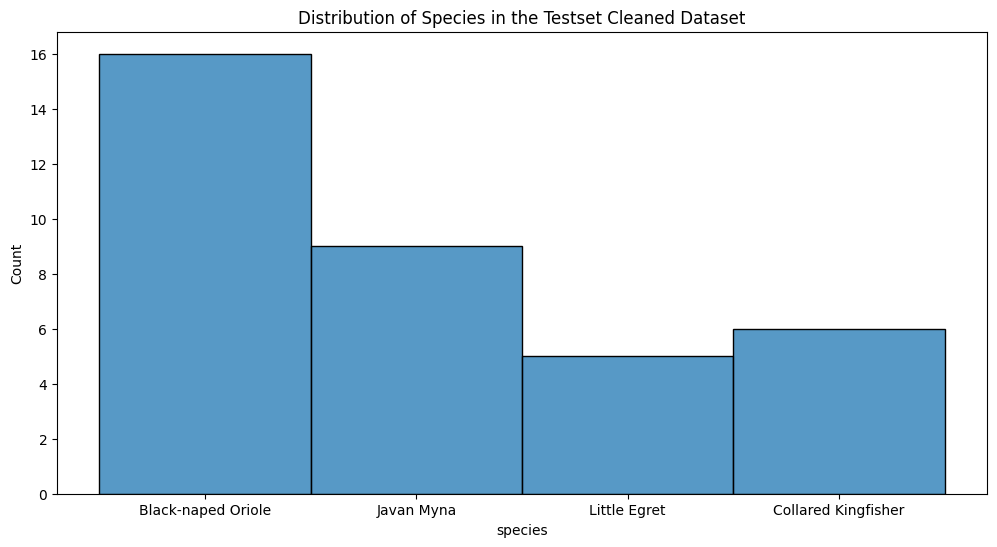

In [16]:
group=testset.groupby(['species']).count()
plt.figure(figsize=(12, 6))  
sns.histplot(testset['species'])
plt.title('Distribution of Species in the Testset Cleaned Dataset')
plt.show()

We can observe that the ```Black-naped Oriole``` is **overwhelmingly** high in count as compared to the other species. This would indicate that this ```Black-naped Oriole``` may have more unpredicted labels than the others due to the balance of the dataset, as reflected in the future. 

Overall, this is very helpful in understanding the confusion matrix later.

## **Section C: Vectorizing**
After conducting the data pre-processing, we can now conduct the vectorizing

In [17]:
test=testset['final_cleaned_text']
vector=cv.transform(test)

print(f"""
testset shape: {vector.toarray().shape}
features: {cv.get_feature_names_out()}
      """)


testset shape: (36, 7000)
features: ['ability' 'able' 'abundance' ... 'zhao renhui' 'zimbabwe'
 'zimbabwe zambia']
      


## **Section D: Model Testing**


In [18]:
y_test=testset['species'] #define the y-variable

We firstly continue with our model prediction with the Linear Support Vector Machine. 

In [19]:
y_testresults=lvc.predict(vector)

In [20]:
print(classification_report(y_test, y_testresults, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       1.00      0.75      0.86        16
Collared Kingfisher       0.75      1.00      0.86         6
         Javan Myna       0.80      0.89      0.84         9
       Little Egret       0.67      0.80      0.73         5

           accuracy                           0.83        36
          macro avg       0.80      0.86      0.82        36
       weighted avg       0.86      0.83      0.84        36



In [21]:
f1score=f1_score(y_test, y_testresults,average='weighted')
print(f'f1 score: {f1score}')

f1 score: 0.8353459406090985


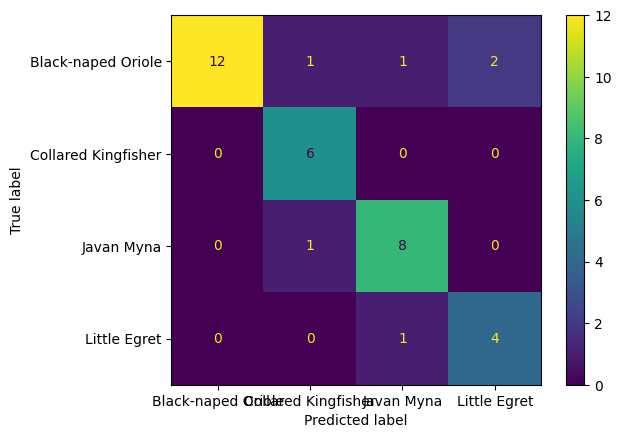

In [22]:
cm=confusion_matrix(y_test, y_testresults, labels=lvc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lvc.classes_)
disp.plot()
plt.show()

==> With the F1 Score of 86.08%, this means that the model performs relatively well on the test data as well, using the same count vectorizer. When compared to the training data, the model's F1 score was 87%.98%. This would indicate a slight amount of overfitting, which is rather insignificant overall. When examining the confusion matrix, we can observe that on average, most labels are predicted correctly, which is a very good sign. However, there are some true labelled 'Black-naped Oriole' data that is mislabelled as birds from other species.

Next, we continue with our model prediction with the Complement Naive Bayes

In [23]:
y_testresults=cnb.predict(vector)

In [24]:
print(classification_report(y_test, y_testresults, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       1.00      0.81      0.90        16
Collared Kingfisher       0.86      1.00      0.92         6
         Javan Myna       0.82      1.00      0.90         9
       Little Egret       0.80      0.80      0.80         5

           accuracy                           0.89        36
          macro avg       0.87      0.90      0.88        36
       weighted avg       0.90      0.89      0.89        36



In [25]:
f1score=f1_score(y_test, y_testresults,average='weighted')
print(f'f1 score: {f1score}')

f1 score: 0.8884246979074566


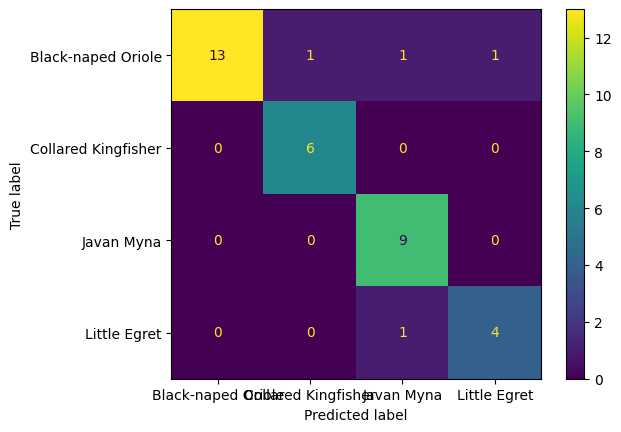

In [26]:
cm=confusion_matrix(y_test, y_testresults, labels=cnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cnb.classes_)
disp.plot()
plt.show()

==> With the F1 score of 88.84%, this means that the model performs relatively well on the test data as well, and performs better than the Linear Support Vector Machine model as well. When compared to the training data, the model's F1 score was 88.00%. This indicates that the ```test data performs marginally better than the training data```, which **does not indicate overfitting**. We can also observe that on average, most of the data are predicted correctly as with the true label. There are some false positives but they are rather little,  and we can observe that the incorrect labels are slightly lesser than that of the ones from the linear support vector machine. Which indicate ```better model performance``` in predicting the species **correctly**. 


## **Section E: Evaluation and Conclusion** 

Let's take a look at the performance of the short-listed models after training the data. <br>
 Model | Training | Test |
| --- | :---: | :----: | 
| Complement Naive Bayes | 88.00% | 88.84% |
| Linear Support Vector Machine | 87.98% | 86.08% |
<br>

We can observe that ```Complement Naive Bayes``` model had the better performance than Linear Support Vector Machine, and it had little overfitting as well. As such, we can determine the best model is Complement Naive Bayes. 

> Best Model: **Complement Naive Bayes**


#### **Evaluation and Areas for Improvement** 

- Overall, I would say that the comprehensive preprocessing, vectorizing and modelling phases are relatively good as it has covered all phases of the modelling phase.
- This means that the model is able to predict the correct the correct labels(species) and minimise false positives (predicting the wrong species)
<br><br>

**Areas for Improvement**   

- better embeddings such as glove could be used to capture better text patterns
- use deep learning models such as neural networks which can help to better identify patterns and break them down for greater text classification
- more of a hyperparameter fine tuning. In this case, not much fine tuning was needed, but some form of fine tuning could have been done to better facilitate a better model result. 

